In [156]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [157]:
img = cv2.imread('/content/drive/MyDrive/dataset/roger_federer/07548250.jpg')
img.shape

(675, 1200, 3)

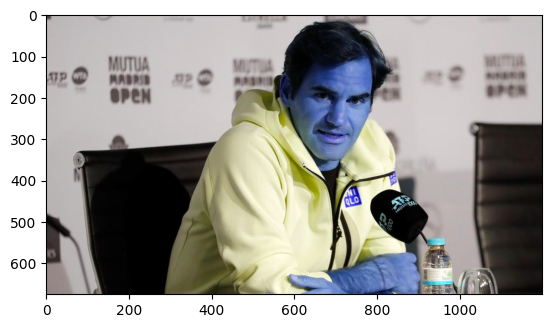

In [158]:
plt.imshow(img)


In [159]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(675, 1200)

In [160]:
gray


array([[ 65,  66,  67, ..., 195, 195, 195],
       [ 64,  64,  65, ..., 195, 195, 195],
       [ 65,  65,  64, ..., 195, 195, 195],
       ...,
       [135, 135, 135, ...,  14,  16,  18],
       [135, 135, 135, ...,  14,  16,  18],
       [135, 135, 135, ...,  15,  16,  18]], dtype=uint8)

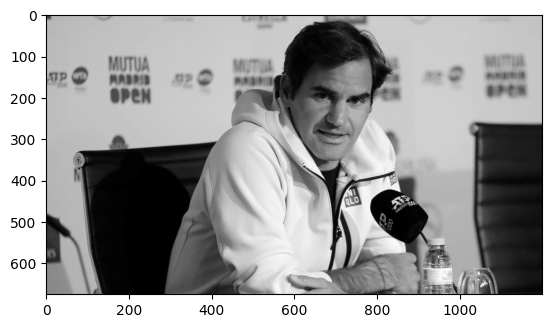

In [161]:
plt.imshow(gray, cmap='gray')

In [162]:
face_cascade = cv2.CascadeClassifier('/content/OpenCV/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/content/OpenCV/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[600, 121, 216, 216]], dtype=int32)

In [163]:
(x,y,w,h) = faces[0]
x,y,w,h

(600, 121, 216, 216)

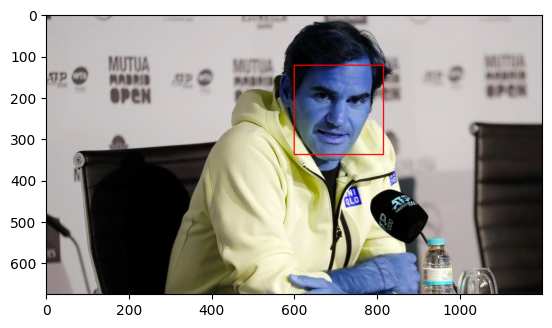

In [164]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

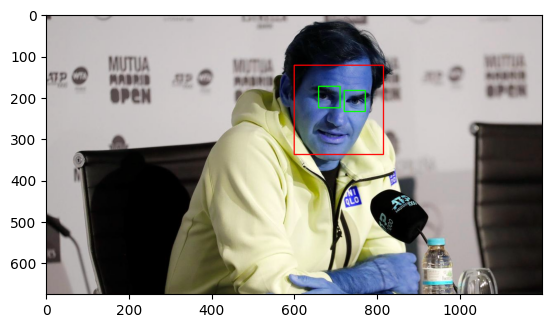

In [165]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)


plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

## Preprocessing: Crop the facial region of the image

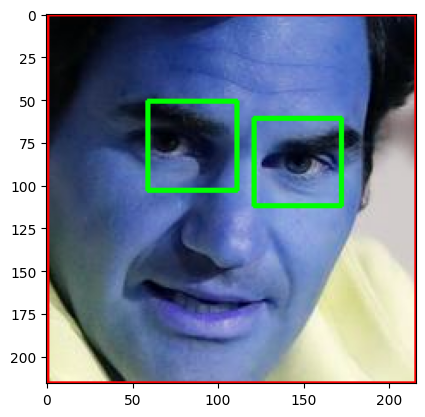

In [166]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [167]:
cropped_img = np.array(roi_color)
cropped_img.shape

(216, 216, 3)

### Preprocessing: Use wavelet transform as a feature for traning our model

In [169]:
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)
    imArray /= 255;
    # compute coefficients
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0;

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

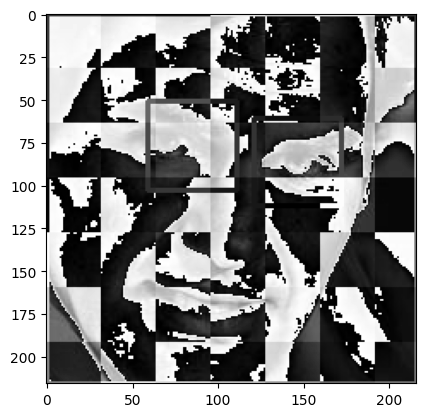

In [170]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

### Preprocessing: Load image, detect face. If eyes >=2, then save and crop the face region

In [171]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

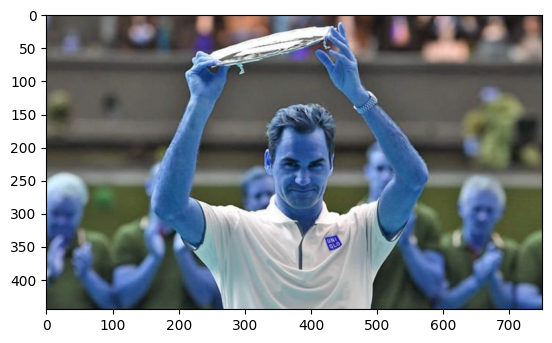

In [172]:
original_image = cv2.imread('/content/drive/MyDrive/dataset/roger_federer/1256138.jpg')
plt.imshow(original_image)

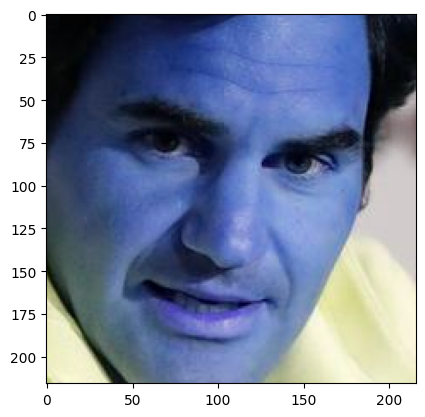

In [173]:
cropped_image = get_cropped_image_if_2_eyes('/content/drive/MyDrive/dataset/roger_federer/07548250.jpg')
plt.imshow(cropped_image)

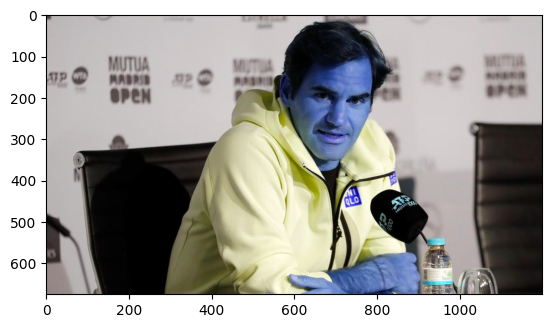

In [174]:
org_image_obstructed = cv2.imread('/content/drive/MyDrive/dataset/roger_federer/07548250.jpg')
plt.imshow(org_image_obstructed)

In [175]:
path_to_data = "/content/Datasets"
path_to_cr_data = "/content/Datasets/cropped"

In [176]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [177]:
img_dirs

['/content/Datasets/serena_williams',
 '/content/Datasets/roger_federer',
 '/content/Datasets/lionel_messi',
 '/content/Datasets/virat_kohli',
 '/content/Datasets/maria_sharapova',
 '/content/Datasets/.ipynb_checkpoints']

In [178]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [179]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  /content/Datasets/croppedserena_williams
Generating cropped images in folder:  /content/Datasets/croppedroger_federer
Generating cropped images in folder:  /content/Datasets/croppedlionel_messi
Generating cropped images in folder:  /content/Datasets/croppedmaria_sharapova


### Manually examine cropped folder and delete any unwanted images

In [180]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'croppedserena_williams': ['/content/Datasets/croppedserena_williams/serena_williams18.png',
  '/content/Datasets/croppedserena_williams/serena_williams22.png',
  '/content/Datasets/croppedserena_williams/serena_williams12.png',
  '/content/Datasets/croppedserena_williams/serena_williams7.png',
  '/content/Datasets/croppedserena_williams/serena_williams17.png',
  '/content/Datasets/croppedserena_williams/serena_williams24.png',
  '/content/Datasets/croppedserena_williams/serena_williams26.png',
  '/content/Datasets/croppedserena_williams/serena_williams25.png',
  '/content/Datasets/croppedserena_williams/serena_williams28.png',
  '/content/Datasets/croppedserena_williams/serena_williams5.png',
  '/content/Datasets/croppedserena_williams/serena_williams32.png',
  '/content/Datasets/croppedserena_williams/serena_williams10.png',
  '/content/Datasets/croppedserena_williams/serena_williams4.png',
  '/content/Datasets/croppedserena_williams/serena_williams19.png',
  '/content/Datasets/crop

In [181]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'croppedserena_williams': 0,
 'croppedroger_federer': 1,
 'croppedlionel_messi': 2,
 'croppedvirat_kohli': 3,
 'croppedmaria_sharapova': 4}

Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now


In [182]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [183]:
len(X[0])


4096

In [184]:
X[0]


array([[ 36],
       [ 30],
       [ 23],
       ...,
       [233],
       [ 20],
       [230]], dtype=uint8)

In [185]:
y[0]


0

In [186]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(173, 4096)

Data cleaning process is done. Now we are ready to train our model

In [187]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.75

In [189]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Define the pipeline with SVC
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf', C=10))])

# Fit the pipeline
pipe.fit(X_train, y_train)

# Evaluate the model
score = pipe.score(X_test, y_test)
print("Test set score:", score)


Test set score: 0.75


In [190]:
print(classification_report(y_test, pipe.predict(X_test)))


              precision    recall  f1-score   support

           0       0.53      0.89      0.67         9
           1       1.00      0.60      0.75        10
           2       1.00      0.33      0.50         3
           3       0.80      0.86      0.83        14
           4       0.86      0.75      0.80         8

    accuracy                           0.75        44
   macro avg       0.84      0.69      0.71        44
weighted avg       0.81      0.75      0.75        44



Let's use GridSearch to try out different models with different paramets. Goal is to come up with best model with best fine tuned parameters

In [191]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [192]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [193]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.775385,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.612615,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.790769,{'logisticregression__C': 1}


In [194]:
best_estimators


{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [195]:
best_estimators['svm'].score(X_test,y_test)


0.7045454545454546

In [196]:
best_estimators['random_forest'].score(X_test,y_test)


0.6363636363636364

In [135]:
best_estimators['logistic_regression'].score(X_test,y_test)


0.7916666666666666

In [198]:
best_clf = best_estimators['logistic_regression']


In [199]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 8,  0,  0,  0,  1],
       [ 2,  8,  0,  0,  0],
       [ 1,  0,  1,  1,  0],
       [ 1,  1,  0, 11,  1],
       [ 1,  1,  1,  0,  5]])

Text(95.72222222222221, 0.5, 'Truth')

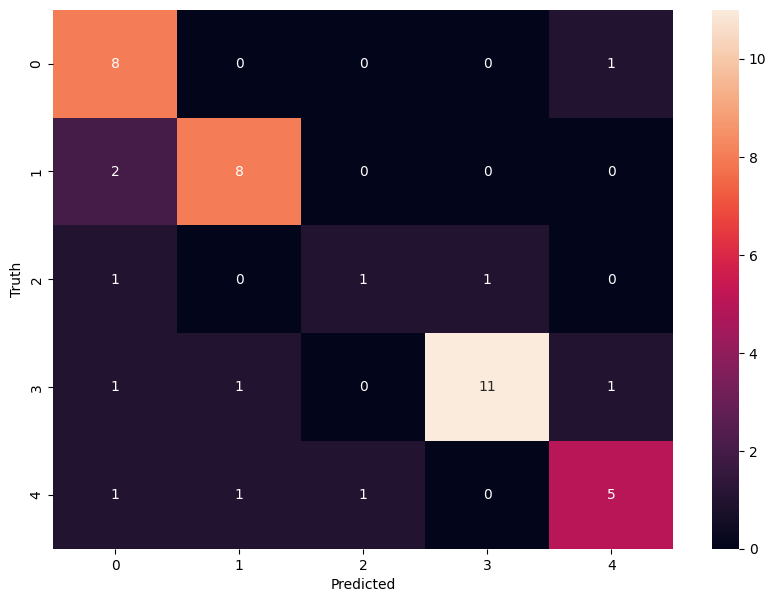

In [200]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [201]:
class_dict

{'croppedserena_williams': 0,
 'croppedroger_federer': 1,
 'croppedlionel_messi': 2,
 'croppedvirat_kohli': 3,
 'croppedmaria_sharapova': 4}

In [202]:
!pip install joblib
import joblib
# Save the model as a pickle in a file
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [203]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

In [143]:
!pip install streamlit

In [144]:
!pip install opencv-python


In [204]:
import streamlit as st
import cv2
import numpy as np
import joblib

In [220]:
%%writefile app.py
import streamlit as st
import cv2
import numpy as np
import joblib

# Load the trained model
model = joblib.load('saved_model.pkl')

# Define a function to process the uploaded image
def process_image(uploaded_image):
    # Convert the image to grayscale (if needed)
    uploaded_image = cv2.cvtColor(uploaded_image, cv2.COLOR_BGR2GRAY)

    # Resize the image to match the input size expected by the model
    input_size = (64, 64)  # Adjust this to match the input size expected by your model
    uploaded_image = cv2.resize(uploaded_image, input_size)

    # Flatten the image to match the input shape expected by the model
    uploaded_image_flattened = uploaded_image.flatten().reshape(1, -1)

    # Predict using the trained model
    predicted_class = model.predict(uploaded_image_flattened)

    class_labels = {0:'serena_williams',1:'roger_federer',2:'lionel_messi',3:'virat_kohli',4:'maria_sharapova'}
    predicted_celebrity = class_labels.get(predicted_class[0], 'Unknown')

    return predicted_celebrity

st.title('Sports Celebrity Recognition')

st.write('This app recognises five celebrities: Viral Kohli, Serena Williams, Maria Sharapova, Roger Federer')

# Upload image through Streamlit
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # Read the image
    image = cv2.imdecode(np.fromstring(uploaded_file.read(), np.uint8), 1)

    # Display the uploaded image
    st.image(image, caption='Uploaded Image.', use_column_width=True)

    # Process the image and predict the celebrity
    predicted_celebrity = process_image(image)

    # Display the predicted celebrity
    st.write(f'Predicted Celebrity: {predicted_celebrity}')


Overwriting app.py


In [206]:
!pip install streamlit -q

In [216]:
!wget -q -O - ipv4.icanhazip.com

34.72.107.132


In [221]:
!streamlit run app.py & npx localtunnel --port 8501

[..................] \ fetchMetadata: sill resolveWithNewModule yargs@17.1.1 ch


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.72.107.132:8501

npx: installed 22 in 1.874s
your url is: https://warm-tables-tie.loca.lt
/content/app.py:38: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  image = cv2.imdecode(np.fromstring(uploaded_file.read(), np.uint8), 1)
/content/app.py:38: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  image = cv2.imdecode(np.fromstring(uploaded_file.read(), np.uint8), 1)
/content/app.py:38: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  image = cv2.imdecode(np.fromstring(uploaded_file.read(), np.uint8), 1)
/content/app.py:38: Deprec